## SEMINARSKA NALOGA

### PRIDOBITEV IN OBLIKOVANJE PODATKOV
 
Stolpci, ki opisujejo naše podatke so naslednji:  
* ZaporednaStevilkaKD,
* MesecStoritve,
* UraStoritve,
* DanVTednu,
* OrganizacijskaEnotaStoritve,
* Povratnik,
* OpisKD,
* PoglavjeKD,
* GospodarskiKriminal,
* OrganiziranKriminal,
* MladoletniskaKriminaliteta,
* Poskus,
* KriminalisticnaOznacba1,
* KriminalisticnaOznacba2,
* KriminalisticnaOznacba3,
* UporabljenoSredstvo1,
* UporabljenoSredstvo2,
* UporabljenoSredstvo3,
* UporabljenoSredstvo4,
* UpravnaEnota,
* OpisKraja,
* LetoZakljucnegaDokumenta,
* VrstaZakDokumenta,
* ZaporednaStevilkaOsebeVKD,
* VrstaOsebe,
* StarostniRazred,
* Spol,
* Drzavljanstvo,
* Poskodba,
* VplivAlkohola,
* VplivMamil,
* OrganiziranaZdruzba,
* Skoda

In [1]:
import pandas as pd
import glob
import warnings
warnings.filterwarnings('ignore')

l = glob.glob('data/*.csv')
for i in range(len(l)):
    l[i] = l[i].split('\\')[-1].upper()

# slovar poti do .csv datotek 
csv_data = {data.split('\\')[1].split('.')[0].upper():data for data in glob.glob('data/*.csv')}

In [2]:
dataframes = {}
for key, value in csv_data.items():
    df = pd.read_csv(csv_data[key], sep=';', encoding='cp1250', skipinitialspace = True)
    dataframes[key.upper()] = df

for df1 in dataframes.values():
    df1.columns = ['MesecStoritve' if x == 'DatumStoritve' else x for x in df]

In [3]:
color_pallete = ['#FF0170', '#F72585', '#B5179E', '#7209B7', '#560BAD', '#480CA8', '#3A0CA3', '#3F37C9', '#4361EE', '#4895EF', '#4CC9F0', '#82D8F2']

### ANALIZA PODATKOV GLEDE NA ČAS

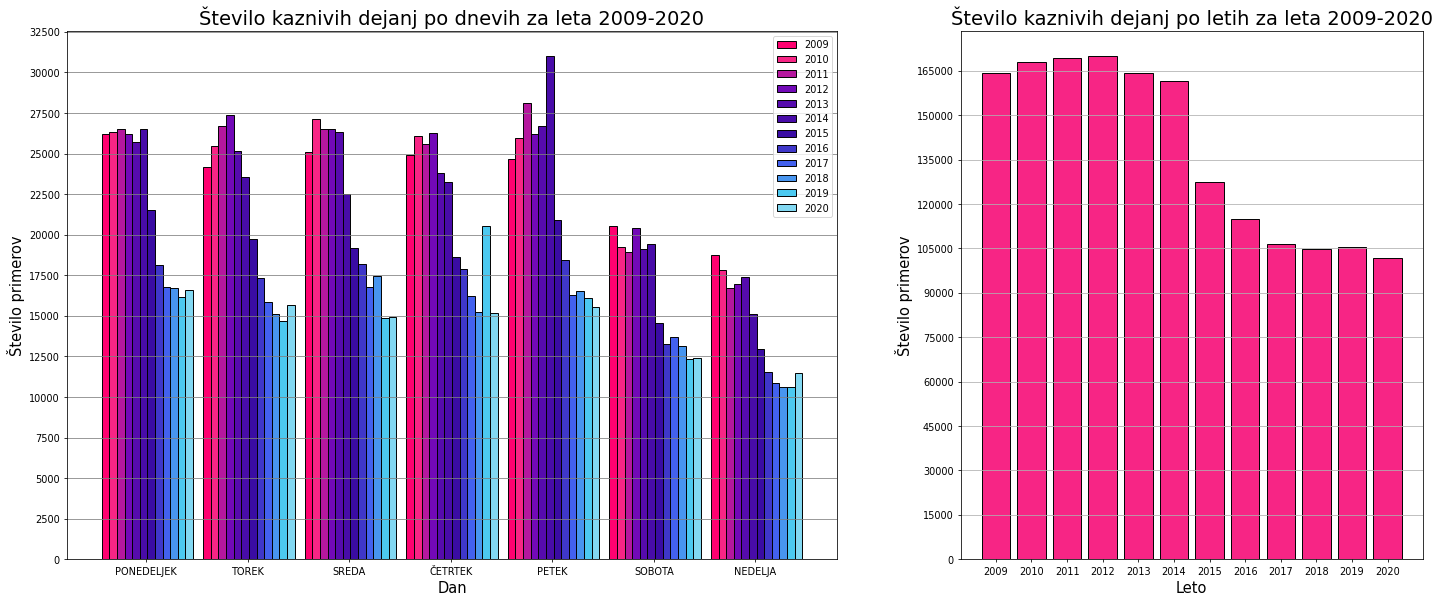

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from copy import copy
def convert_date(s) -> str:
    print(s)
    return s


time_dataframes = {k:v for k,v in dataframes.items()}

l_df = copy(list(time_dataframes.values()))

po_letih = [len(df) for df in l_df]

y_list = []

for key, value in time_dataframes.items():
    df1 = copy(time_dataframes[key])
    dnevi = df1['DanVTednu'].value_counts()
    y_list.append([dnevi.PONEDELJEK, dnevi.TOREK, dnevi.SREDA, dnevi.ČETRTEK, dnevi.PETEK, dnevi.SOBOTA, dnevi.NEDELJA])

width = 0.9/len(y_list)

f, (p1, p2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [5,3]})
f.set_size_inches(25,10)

colors = ['#FF0170', '#F72585', '#B5179E', '#7209B7', '#560BAD', '#480CA8', '#3A0CA3', '#3F37C9', '#4361EE', '#4895EF', '#4CC9F0', '#82D8F2']

for i in range(len(y_list)):
    color = color_pallete[i]
    n=len(y_list[i])
    r = np.arange(n)
    p1.bar(r+width*i, y_list[i], color = color,
        width = width, edgecolor = 'black',
        label=str(2009+i))

# subplot 1. prikaz kriminalističih primerov po dnevih za leta 2009-2020
p1.set_xticks(r+0.4, ['PONEDELJEK', 'TOREK', 'SREDA', 'ČETRTEK', 'PETEK', 'SOBOTA', 'NEDELJA'])
p1.set_title('Število kaznivih dejanj po dnevih za leta 2009-2020', fontsize=20)
p1.set_xlabel('Dan', fontsize=15)
p1.set_ylabel('Število primerov', fontsize=15)
p1.legend()
p1.grid(axis='y', color='gray')
p1.set_yticks(np.arange(0, 35000, step=2500))

# subplot 1. prikaz kriminalističih primerov po letih za leta 2009-2020
p2.bar(['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020'], po_letih, color='#F72585', edgecolor='black')
p2.set_yticks(np.arange(0, 180000, step=15000))
p2.grid(axis='y')
p2.set_title('Število kaznivih dejanj po letih za leta 2009-2020', fontsize=20)
p2.set_ylabel('Število primerov', fontsize=15)
p2.set_xlabel('Leto', fontsize=15)
plt.gcf().set_dpi(70)
plt.show()

**UGOTOVITVE:** Ugotovitve kažejo, da je med vikendom popisanih manj kaznivih dejanj kot med tednom. Ob petkih pa je le teh največ. Zanimiva sta odstopanja v **četrtek leta 2019** in v **petek leta 2014**.

**Ugotavljanje v katerih urah se zgodi največ kriminala**  
Pri tej analizi uporabimo podatke za vsa leta po stolpcu **UraStoritve** ter jih povprečimo da dobimo bolj splošne rezultate

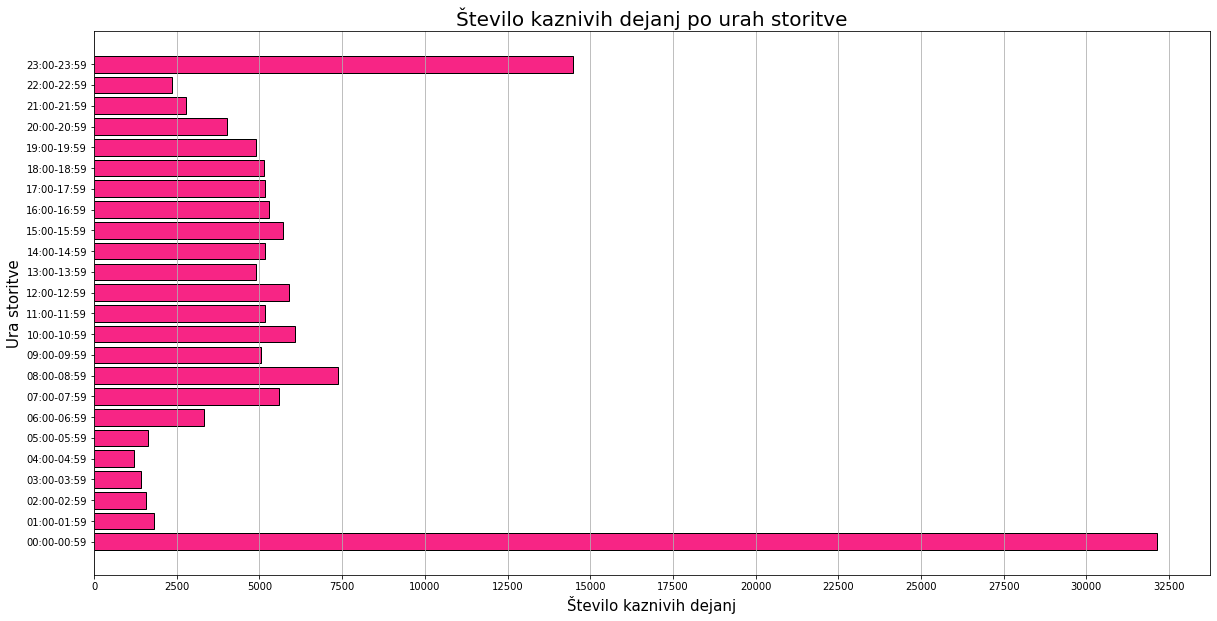

In [5]:
dataframes_fixed_dates = {}

for key, value in time_dataframes.items():
    df1 = copy(time_dataframes[key])
    df1['MesecStoritve'] = df1['MesecStoritve'].apply(lambda x: str(x)[:-4]+'.'+str(x)[-4:])
    df1['MesecStoritve'] =  pd.to_datetime(df1['MesecStoritve'], format='%m.%Y')
    dataframes_fixed_dates[key] = df1

ure_vse = []
povp_ure = []
ure = [
    '00:00-00:59',
    '01:00-01:59',
    '02:00-02:59',
    '03:00-03:59',
    '04:00-04:59',
    '05:00-05:59',
    '06:00-06:59',
    '07:00-07:59',
    '08:00-08:59',
    '09:00-09:59',
    '10:00-10:59',
    '11:00-11:59',
    '12:00-12:59',
    '13:00-13:59',
    '14:00-14:59',
    '15:00-15:59',
    '16:00-16:59',
    '17:00-17:59',
    '18:00-18:59',
    '19:00-19:59',
    '20:00-20:59',
    '21:00-21:59',
    '22:00-22:59',
    '23:00-23:59',
]

i = 0
for key, value in dataframes_fixed_dates.items():
    ure_vse.append(list(value['UraStoritve'].value_counts().sort_index()))
    i += 1

for i in range(len(ure_vse[1])):
    x = 0
    for ura in ure_vse:
        x += ura[i]
    povp_ure.append(x/len(ure_vse))

plt.figure(figsize=(20,10))
plt.barh(ure, povp_ure, color='#F72585', edgecolor='black')
plt.grid(axis='x')
plt.xticks(np.arange(0, 35000, step=2500))
plt.title('Število kaznivih dejanj po urah storitve', fontsize=20)
plt.ylabel('Ura storitve', fontsize=15)
plt.xlabel('Število kaznivih dejanj', fontsize=15)
plt.show()

**UGOTOVITVE:** Iz ugotovitev se največ kaznivih dejanj zgodi med **23:00 in 01:00**. To se zdi smiselno, saj večina ljudi takrat zapustijo lokale(verjetno vinjeni) in se zato zgodi več kaznivih dejanj. Število kaznivih dejanj pade v urah spanca **01:00-06:00** ter **21:00-23:00**. Podnevi kazniva dejanja narastejo, ampak še vedno ne tako kot med 23:00 in 01:00.

### ANALIZA PODATKOV GLEDE NA ORGANIZIRANO ZDRUŽBO

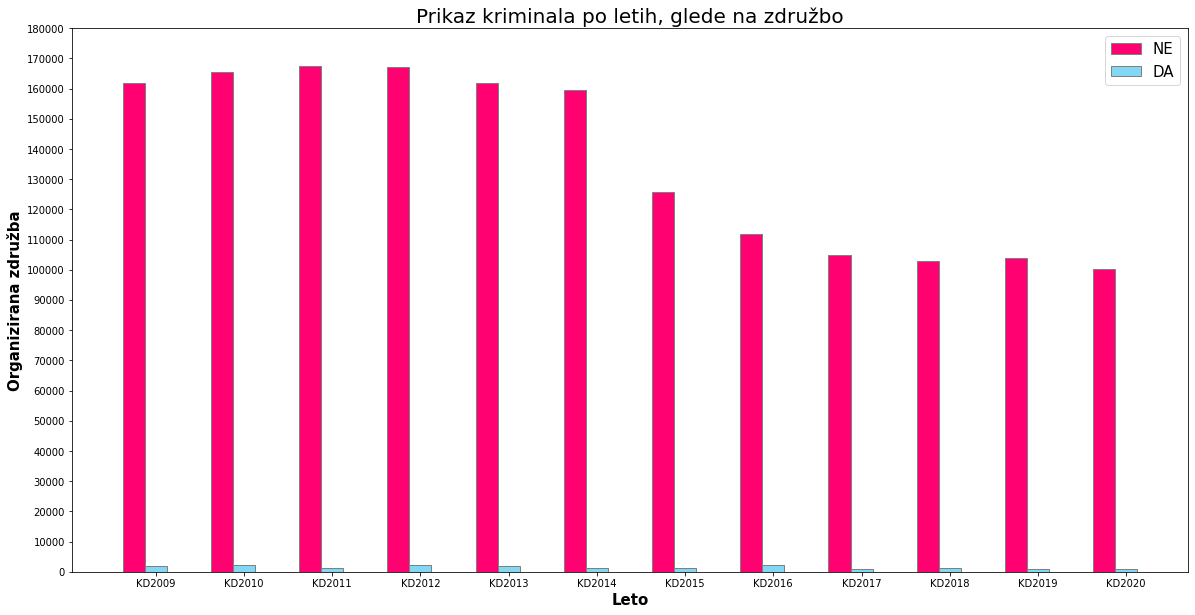

Text(0, 0.5, 'Organizirana združba (DA)')

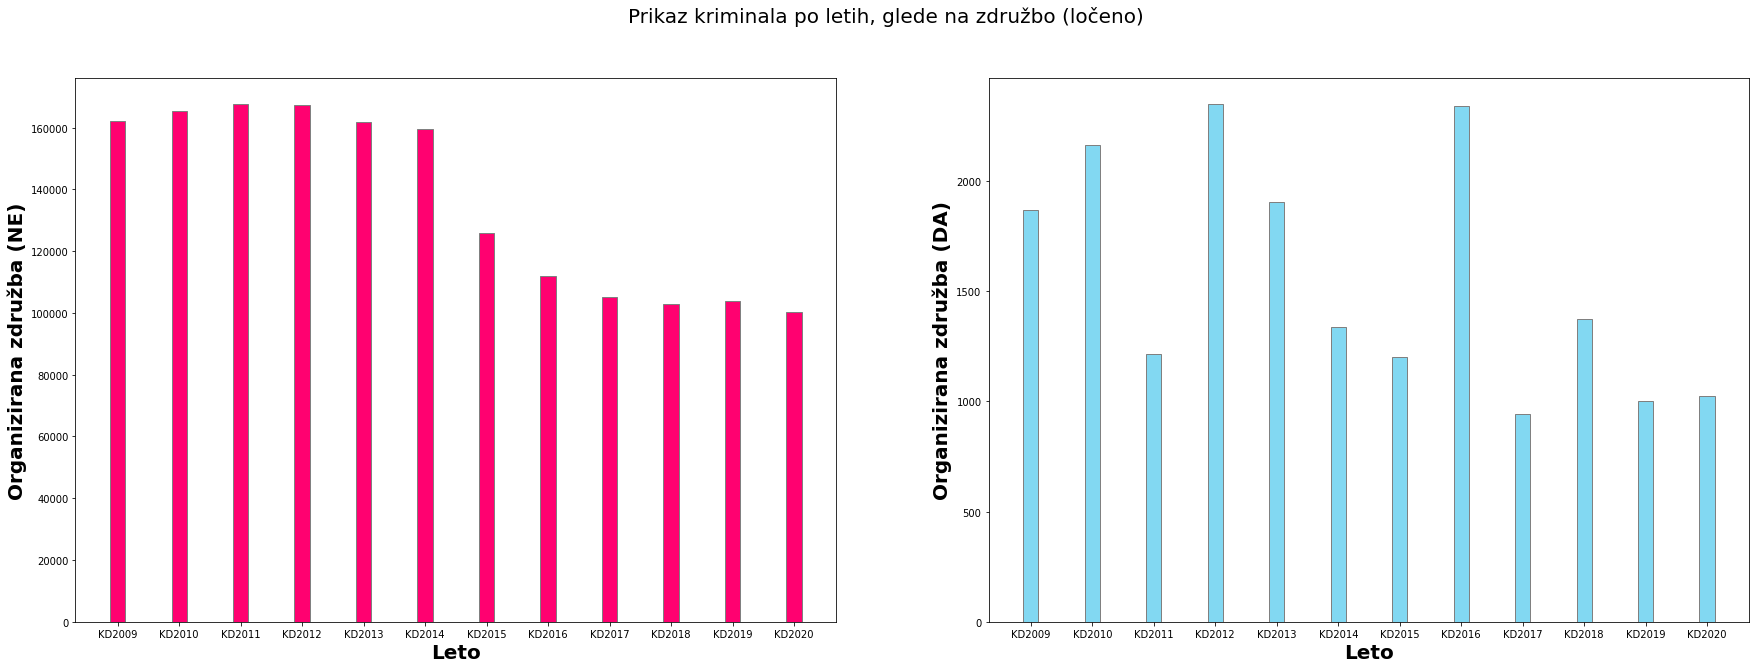

In [6]:
podatka = {}
podatki_NE = []
podatki_DA = []
ind = []

df = {k:v for k,v in dataframes.items()}

for key, value in df.items():
    df1 = copy(df[key])
    podatki = df1["OrganiziranaZdruzba"].value_counts()
    podatki_NE.append(podatki.values.tolist()[0])
    podatki_DA.append(podatki.values.tolist()[1])
    ind.append(key)

#Prikaz kriminala glede na združbo, lažje opažanje razlike
barWidth = 0.25
fig = plt.subplots(figsize =(20, 10))
br1 = np.arange(len(podatki_NE))
br2 = [x + barWidth for x in br1]

plt.title("Prikaz kriminala po letih, glede na združbo", fontsize=20)
plt.bar(br1, podatki_NE, color = '#FF0170', width = barWidth,
        edgecolor ='grey', label ='NE')
plt.bar(br2, podatki_DA, color ='#82D8F2', width = barWidth,
        edgecolor ='grey', label ='DA')
plt.xlabel('Leto', fontweight ='bold', fontsize = 15)
plt.ylabel('Organizirana združba', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(podatki_NE))], ind)
plt.yticks(np.arange(0,190000, step=10000))
plt.legend(fontsize=15)
plt.show()

#Prikaz kriminala glede na združbo ločeno, lažji prikaz števila
fg, (pl1, pl2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [4,4]})
fg.set_size_inches(30,10)
fg.suptitle("Prikaz kriminala po letih, glede na združbo (ločeno)", fontsize=20)

pl1.bar(ind, podatki_NE ,color = '#FF0170', width = barWidth, edgecolor ='grey', label ='NE')
pl1.set_xlabel('Leto', fontweight ='bold', fontsize = 20)
pl1.set_ylabel('Organizirana združba (NE)', fontweight ='bold', fontsize = 20)

pl2.bar(ind, podatki_DA, color = '#82D8F2', width = barWidth, edgecolor ='grey', label ='DA')
pl2.set_xlabel('Leto', fontweight ='bold', fontsize = 20)
pl2.set_ylabel('Organizirana združba (DA)', fontweight ='bold', fontsize = 20)

**UGOTOVITVE:** Iz grafov je kar najbolje razvidno, da v Sloveniji v vseh teh letih ni prišlo do večjega števila kriminala v organiziranih združbah, kar pomeni, da so skoraj vsi kriminalci, posamezniki. Razlika je vidna predvsem v 1. grafu, ki prikazuje obe vrednosti skupaj. Nato sta pod njim še razčlenjeni verziji za lažjo berljivost številk.

### Prikaz podatkov glede na mladoletnost in vpletenost v organizirane združbe

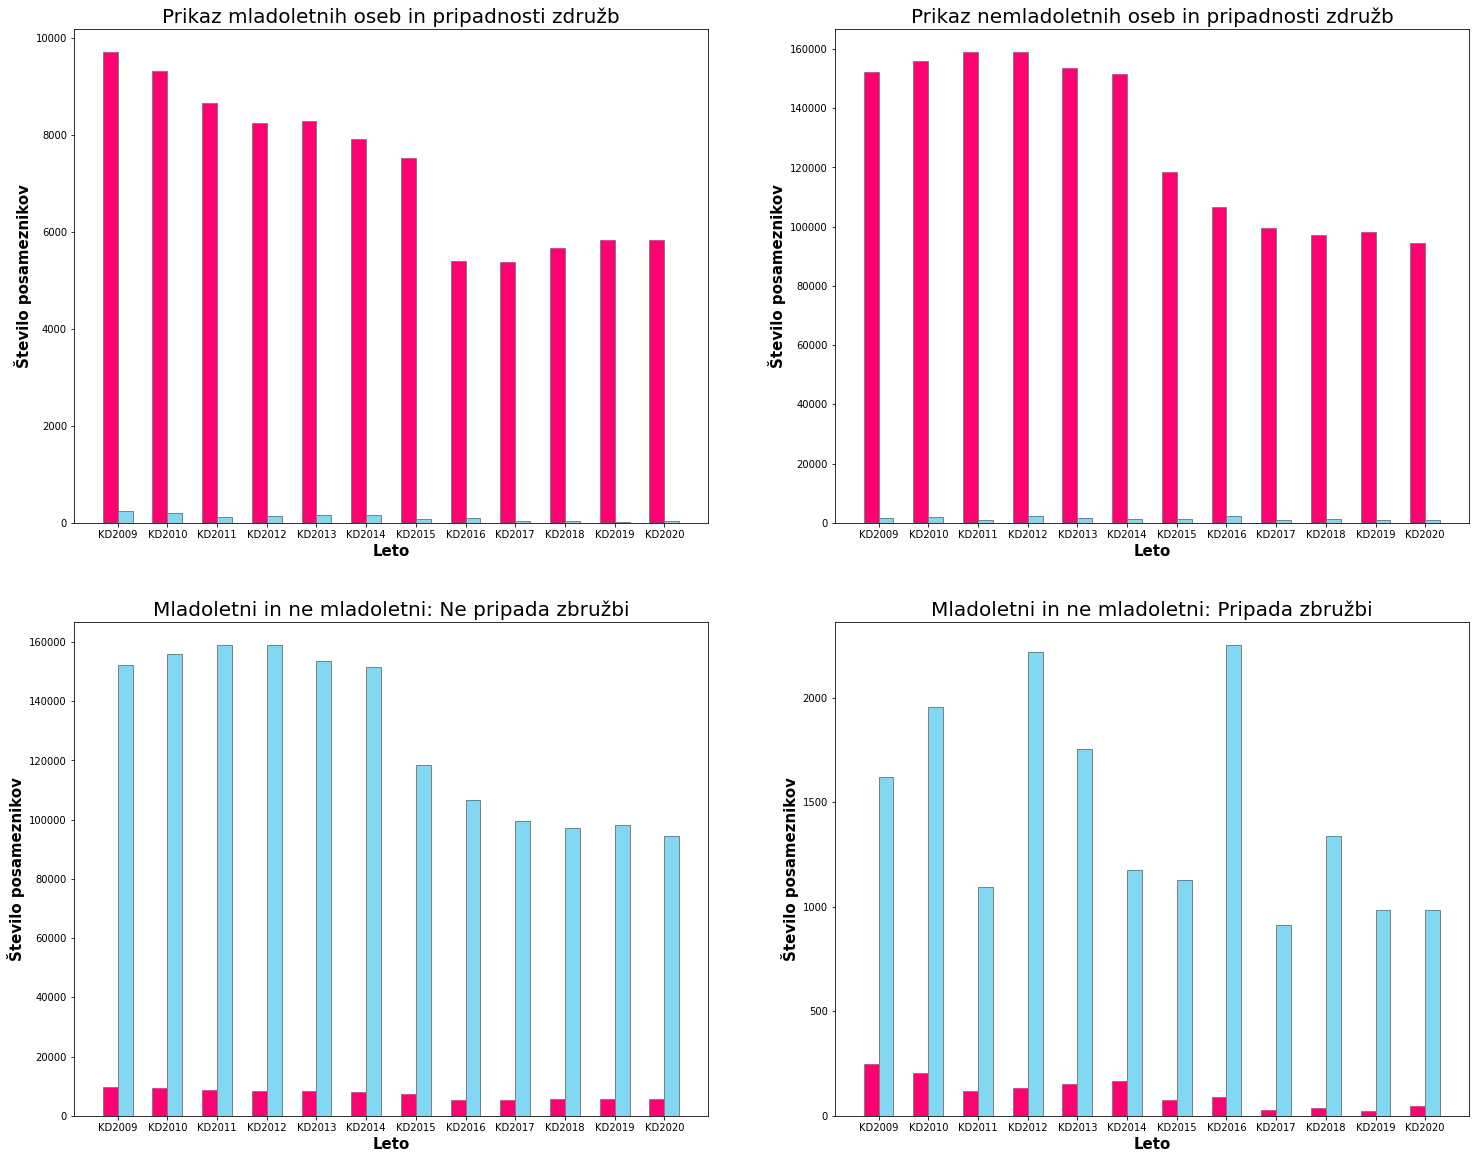

In [100]:
#df1[((df1["StarostniRazred"] == "00-07") | (df1["StarostniRazred"] == "41821") | (df1["StarostniRazred"] == "14-16") | (df1["StarostniRazred"] == "16-18")) & (df1["OrganiziranaZdruzba"] == "NE")]
mladoleten_NE = []
mladoleten_DA = []
ne_mladoleten_NE = []
ne_mladoleten_DA = []

df = {k:v for k,v in dataframes.items()}

for key, value in df.items():
    df1 = copy(dataframes[key])
    je_mladoleten = ((df1["StarostniRazred"] == "00-07") | (df1["StarostniRazred"] == "41821") | (df1["StarostniRazred"] == "14-16") | (df1["StarostniRazred"] == "16-18"))
    mladoleten_NE.append(df1[je_mladoleten]["OrganiziranaZdruzba"].value_counts()[0])
    mladoleten_DA.append(df1[je_mladoleten]["OrganiziranaZdruzba"].value_counts()[1])
    ne_mladoleten_NE.append(df1[~je_mladoleten]["OrganiziranaZdruzba"].value_counts()[0])
    ne_mladoleten_DA .append(df1[~je_mladoleten]["OrganiziranaZdruzba"].value_counts()[1])  

"""print(mladoleten_NE)
print(ne_mladoleten_NE)
print(mladoleten_DA)
print(ne_mladoleten_DA)"""

barWidth = 0.30
fig, ((pl1, pl2), (pl3, pl4)) = plt.subplots(2,2, figsize =(25, 20))

X_axis = np.arange(len(ind))

#Prikaz mladoletnih in pripadnosti zbružbam
pl1.title.set_text("Prikaz mladoletnih oseb in pripadnosti združb")
pl1.title.set_fontsize(20)
pl1.bar(X_axis, mladoleten_NE, color = '#FF0170', width = barWidth,
        edgecolor ='grey', label ='NE')
pl1.bar(X_axis+barWidth, mladoleten_DA, color ='#82D8F2', width = barWidth,
        edgecolor ='grey', label ='DA')
pl1.set_xlabel('Leto', fontweight ='bold', fontsize = 15)
pl1.set_ylabel('Število posameznikov', fontweight ='bold', fontsize = 15)
pl1.set_xticks([r+0.15 for r in range(len(ind))], ind)

#Prikaz ne mladoletnih in pripadnosti zbružbam
pl2.title.set_text("Prikaz nemladoletnih oseb in pripadnosti združb")
pl2.title.set_fontsize(20)
pl2.bar(X_axis, ne_mladoleten_NE, color = '#FF0170', width = barWidth,
        edgecolor ='grey', label ='NE')
pl2.bar(X_axis+barWidth, ne_mladoleten_DA, color ='#82D8F2', width = barWidth,
       edgecolor ='grey', label ='DA')
pl2.set_xlabel('Leto', fontweight ='bold', fontsize = 15)
pl2.set_ylabel('Število posameznikov', fontweight ='bold', fontsize = 15)
pl2.set_xticks([r+0.15 for r in range(len(ind))], ind)

#Primerjava mladoletnih in ne  mladoletnih in pripadnosti zbružbam (NE)
pl3.title.set_text("Mladoletni in ne mladoletni: Ne pripada zbružbi")
pl3.title.set_fontsize(20)
pl3.bar(X_axis, mladoleten_NE, color = '#FF0170', width = barWidth,
        edgecolor ='grey', label ='NE')
pl3.bar(X_axis+barWidth, ne_mladoleten_NE, color ='#82D8F2', width = barWidth,
        edgecolor ='grey', label ='NE')
pl3.set_xlabel('Leto', fontweight ='bold', fontsize = 15)
pl3.set_ylabel('Število posameznikov', fontweight ='bold', fontsize = 15)
pl3.set_xticks([r+0.15 for r in range(len(ind))], ind)

#Primerjava mladoletnih in ne  mladoletnih in pripadnosti zbružbam (DA)
pl4.title.set_text("Mladoletni in ne mladoletni: Pripada zbružbi")
pl4.title.set_fontsize(20)
pl4.bar(X_axis, mladoleten_DA, color = '#FF0170', width = barWidth,
        edgecolor ='grey', label ='DA')
pl4.bar(X_axis+barWidth, ne_mladoleten_DA, color ='#82D8F2', width = barWidth,
        edgecolor ='grey', label ='DA')
pl4.set_xlabel('Leto', fontweight ='bold', fontsize = 15)
pl4.set_ylabel('Število posameznikov', fontweight ='bold', fontsize = 15)
pl4.set_xticks([r+0.15 for r in range(len(ind))], ind)